In [3]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.5
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Time series data source: fpp pacakge in R.

WQI_df = pd.read_csv("../Resources_Ritu/Big_lake_Sammamish.csv").drop(['Unnamed: 0'],axis=1)

WQI_df.head()    

,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [4]:
WQI_df["CollectDate"] = pd.to_datetime(WQI_df["CollectDate"])
WQI_df = WQI_df.rename(columns={'CollectDate':'date'})

WQI_df.head()


,date,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [5]:
WQI_time_df = WQI_df[["date","WQI"]].copy()
WQI_time_df.head()

,date,WQI
0,1994-01-06,94.891147
1,1994-01-06,98.699450
2,1994-01-06,101.553997
3,1994-01-06,98.722325
4,1994-01-06,98.721299


In [6]:
WQI_time_mean = WQI_time_df.groupby(["date"]).mean()
WQI_time_mean["WQI"] = round(WQI_time_mean["WQI"],2)
WQI_time_mean.head() 

,WQI
date,
1994-01-06,106.64
1994-02-14,118.47
1994-03-08,127.21
1994-03-22,120.01
1994-04-05,107.72


In [7]:
output_data_file = "../Resources_Ritu/Big_data_date.csv"

# Export the clean water quality data 

WQI_time_mean.to_csv(output_data_file, index="date")

In [8]:
Big_data_date_df = pd.read_csv("../Resources_Ritu/Big_data_date.csv")
Big_data_date_df.head

<bound method NDFrame.head of            date     WQI
0    1994-01-06  106.64
1    1994-02-14  118.47
2    1994-03-08  127.21
3    1994-03-22  120.01
4    1994-04-05  107.72
..          ...     ...
188  2008-08-12   56.55
189  2008-09-09   44.95
190  2008-10-14   45.43
191  2008-11-13   76.72
192  2008-12-09   76.08

[193 rows x 2 columns]>

In [9]:
df_indexed = Big_data_date_df.groupby(["date"]).mean()
df_indexed["WQI"] = round(df_indexed["WQI"],2)
df_indexed.head() 

,WQI
date,
1994-01-06,106.64
1994-02-14,118.47
1994-03-08,127.21
1994-03-22,120.01
1994-04-05,107.72


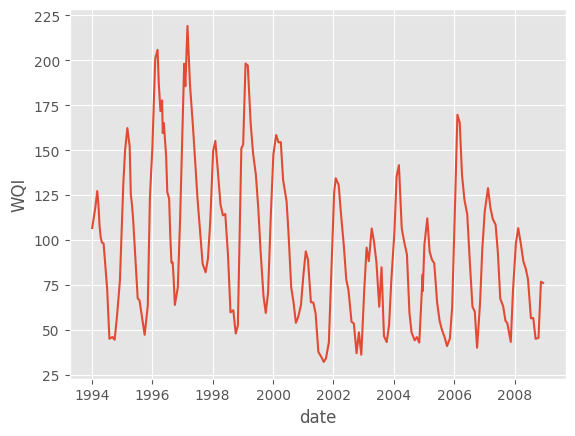

In [10]:
plt.xlabel("date")
plt.ylabel("WQI")
plt.plot(WQI_time_mean)

In [11]:
no_index_df = df_indexed.reset_index()
no_index_df.head()

,date,WQI
0,1994-01-06,106.64
1,1994-02-14,118.47
2,1994-03-08,127.21
3,1994-03-22,120.01
4,1994-04-05,107.72


In [12]:
no_index_df["date"] = pd.to_datetime(no_index_df["date"])
no_index_df.dtypes

date    datetime64[ns]
WQI            float64
dtype: object

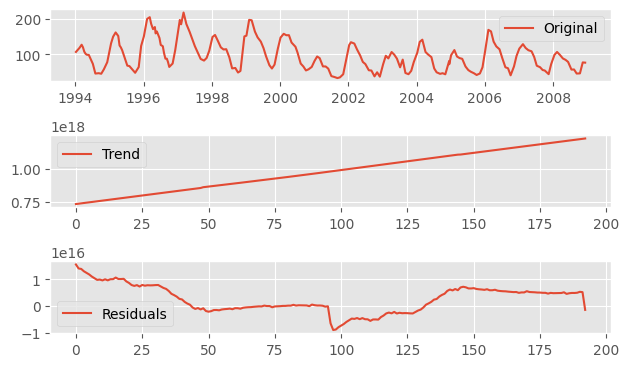

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(x=no_index_df['date'], model='additive', extrapolate_trend='freq', period=int(len(no_index_df)/2))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(WQI_time_mean, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)



In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dicky-Fuller test:
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(timeseries['WQI'], autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
        
    print(df_output)

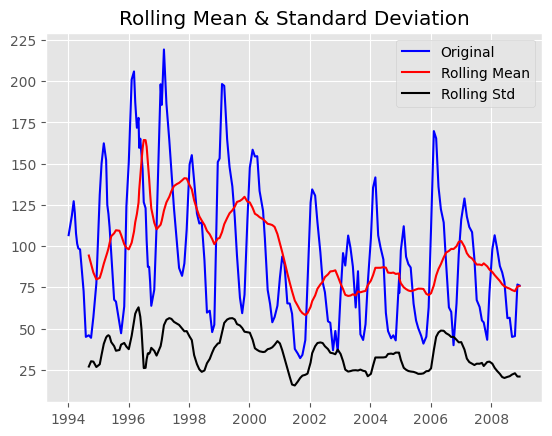

Results of Dickey-Fuller Test:
Test Statistics                 -2.063322
p-value                          0.259516
#Lags Used                       9.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64


In [15]:
test_stationary(WQI_time_mean)

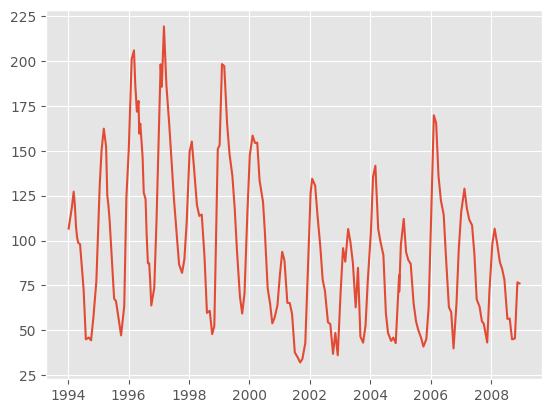

In [16]:
# Estimating trend

data_log_scale = np.log(WQI_time_mean)
plt.plot(WQI_time_mean)

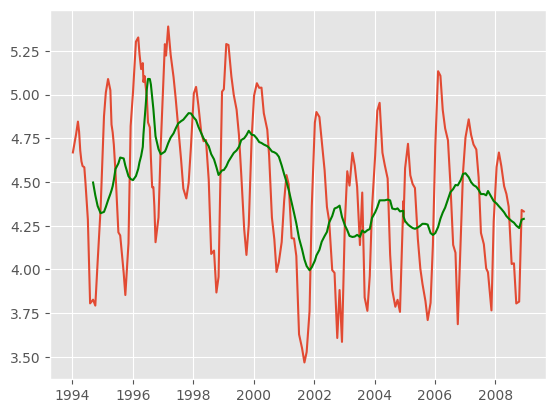

In [17]:
movingAverage = data_log_scale.rolling(window=12).mean()
movingSTD = data_log_scale.rolling(window=12).std()
plt.plot(data_log_scale)
plt.plot(movingAverage, color ='green')

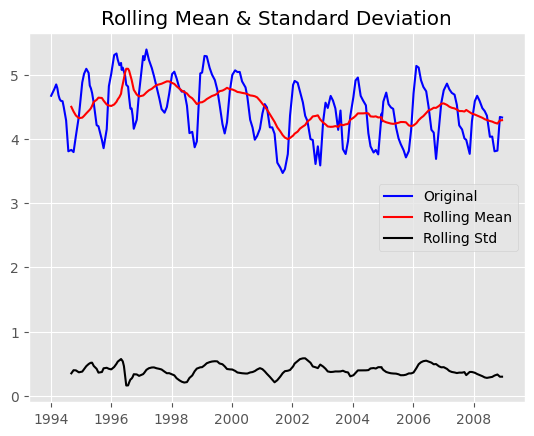

Results of Dickey-Fuller Test:
Test Statistics                 -2.057315
p-value                          0.262021
#Lags Used                       9.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64


In [18]:
test_stationary(data_log_scale)

In [19]:
datasetLogScaleMinusMovingAverage = data_log_scale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)


#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,WQI
date,
1994-09-07,-0.670255
1994-10-04,-0.631116
1994-11-01,-0.320337
1994-12-07,0.025936
1995-01-17,0.546918
1995-02-08,0.654627
1995-03-07,0.693341
1995-04-04,0.592998
1995-04-18,0.376350


In [20]:
df_indexed

,WQI
date,
1994-01-06,106.64
1994-02-14,118.47
1994-03-08,127.21
1994-03-22,120.01
1994-04-05,107.72
...,...
2008-08-12,56.55
2008-09-09,44.95
2008-10-14,45.43


In [21]:
# Trying to see the inverse transformations
df_1 =np.exp(datasetLogScaleMinusMovingAverage+movingAverage)
df_1.head

<bound method NDFrame.head of               WQI
date             
1994-01-06    NaN
1994-02-14    NaN
1994-03-08    NaN
1994-03-22    NaN
1994-04-05    NaN
...           ...
2008-08-12  56.55
2008-09-09  44.95
2008-10-14  45.43
2008-11-13  76.72
2008-12-09  76.08

[193 rows x 1 columns]>

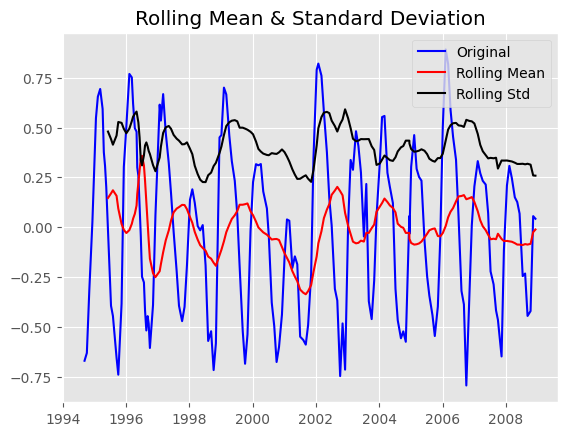

Results of Dickey-Fuller Test:
Test Statistics                 -5.284812
p-value                          0.000006
#Lags Used                      13.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [22]:
test_stationary(datasetLogScaleMinusMovingAverage)

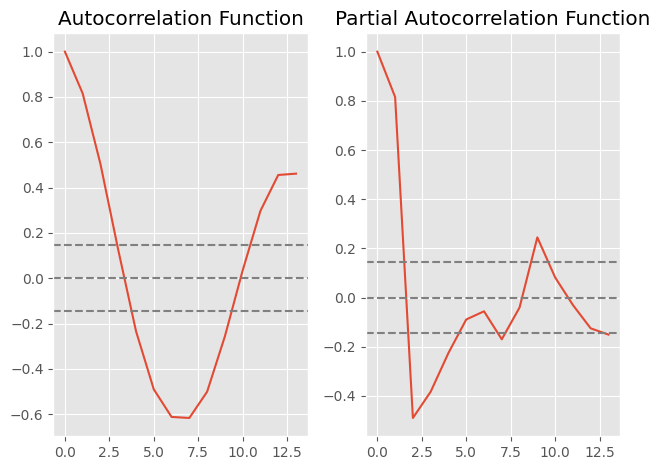

In [23]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogScaleMinusMovingAverage, nlags=13)
lag_pacf = pacf(datasetLogScaleMinusMovingAverage, nlags=13, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot ACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingAverage)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [24]:
 #pip install statsmodels --upgrade

In [25]:
#dataset_1 = datasetLogScaleMinusMovingAverage.reset_index()
#dataset_1.head()

In [26]:
dataset_1 = datasetLogScaleMinusMovingAverage

y = dataset_1.values


print(y.shape)


(182, 1)


In [27]:
datasetLogScaleMinusMovingAverage

,WQI
date,
1994-09-07,-0.670255
1994-10-04,-0.631116
1994-11-01,-0.320337
1994-12-07,0.025936
1995-01-17,0.546918
...,...
2008-08-12,-0.232558
2008-09-09,-0.445378
2008-10-14,-0.420804


In [28]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
dataset_1_train, dataset_1_test = train_test_split(datasetLogScaleMinusMovingAverage, random_state=78)


In [29]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(y, random_state=78)

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
#AR MODEL
model = sm.tsa.ARIMA(dataset_1_train, order=(2,1,2))

model_fit = model.fit()
print(model_fit.summary())

C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

                               SARIMAX Results                                
Dep. Variable:                    WQI   No. Observations:                  136
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -76.165
Date:                Thu, 17 Nov 2022   AIC                            162.330
Time:                        11:38:55   BIC                            176.856
Sample:                             0   HQIC                           168.233
                                - 136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0582      0.128     -8.295      0.000      -1.308      -0.808
ar.L2         -0.0714      0.093     -0.764      0.445      -0.254       0.112
ma.L1         -0.0018    495.965  -3.69e-06      1.0

C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting ARIMA model


C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


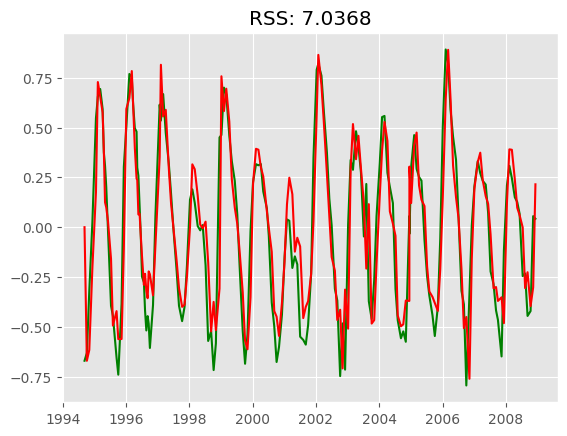

In [31]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

#ARIMA MODEL
model = sm.tsa.ARIMA(datasetLogScaleMinusMovingAverage, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogScaleMinusMovingAverage, color='green')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingAverage['WQI'])**2))
print('Plotting ARIMA model')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

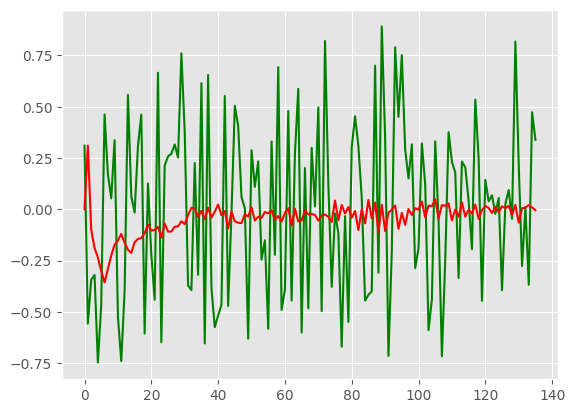

In [32]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

#ARIMA MODEL
model = sm.tsa.ARIMA(y_train, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(y_train, color='green')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-y_train['WQI'])**2))
print('Plotting ARIMA model')

Plotting ARIMA model


C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


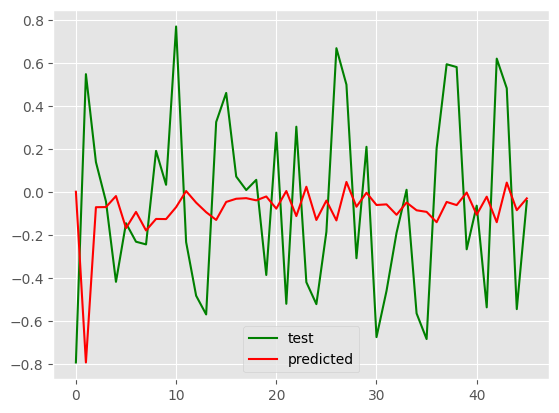

In [41]:
#ARIMA MODEL
model = sm.tsa.ARIMA(y_test, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(y_test, color='green', label='test')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-y_test['WQI'])**2))

print('Plotting ARIMA model')

Plotting ARIMA model


C:\Users\gothw\anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


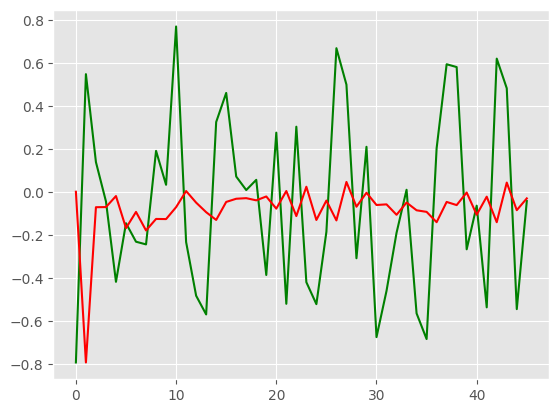

In [40]:
#ARIMA MODEL
model = sm.tsa.ARIMA(y_test, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(y_test, color='green')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-y_test['WQI'])**2))
print('Plotting ARIMA model')

In [54]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

0    0.000000
1   -0.794258
2   -0.072028
3   -0.071395
4   -0.020116
dtype: float64


In [55]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head

<bound method NDFrame.head of 0     0.000000
1    -0.794258
2    -0.866286
3    -0.937681
4    -0.957797
5    -1.126857
6    -1.220775
7    -1.400943
8    -1.527526
9    -1.654786
10   -1.726576
11   -1.723376
12   -1.774068
13   -1.869206
14   -2.000454
15   -2.047914
16   -2.080547
17   -2.110458
18   -2.150526
19   -2.172591
20   -2.251170
21   -2.247857
22   -2.361054
23   -2.337892
24   -2.469268
25   -2.510343
26   -2.643706
27   -2.598184
28   -2.667887
29   -2.672596
30   -2.734293
31   -2.793068
32   -2.900349
33   -2.950807
34   -3.037120
35   -3.130810
36   -3.272508
37   -3.320006
38   -3.382148
39   -3.385869
40   -3.492816
41   -3.515784
42   -3.657616
43   -3.615103
44   -3.700944
45   -3.731940
dtype: float64>

In [56]:
predictions_ARIMA_log = pd.Series(datasetLogScaleMinusMovingAverage['WQI'], index=datasetLogScaleMinusMovingAverage.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head

<bound method NDFrame.head of 1994-09-07 00:00:00   -0.670255
1994-10-04 00:00:00   -0.631116
1994-11-01 00:00:00   -0.320337
1994-12-07 00:00:00    0.025936
1995-01-17 00:00:00    0.546918
                         ...   
41                    -3.515784
42                    -3.657616
43                    -3.615103
44                    -3.700944
45                    -3.731940
Length: 228, dtype: float64>

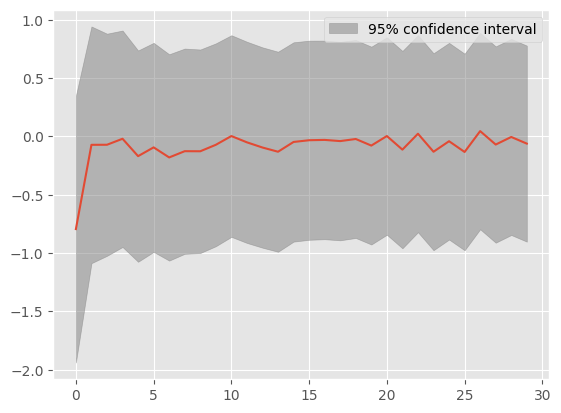

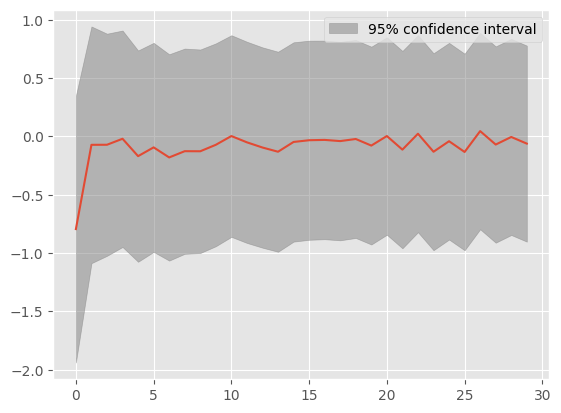

In [61]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results_ARIMA, 1,30)
#x=results_ARIMA.forecast(steps=30)